In [34]:
import os
import sys
import clr

 
clr.AddReference("System.Runtime.InteropServices")
from System.Runtime.InteropServices import Marshal

 

#set the following path to the installed SAP2000 program directory
clr.AddReference(R'C:\Program Files\Computers and Structures\SAP2000 23\SAP2000v1.dll')
from SAP2000v1 import *

 

#set the following flag to True to execute on a remote computer
Remote = False

#if the above flag is True, set the following variable to the hostname of the remote computer
#remember that the remote computer must have SAP2000 installed and be running the CSiAPIService.exe
RemoteComputer = "SpareComputer-DT"

#set the following flag to True to attach to an existing instance of the program
#otherwise a new instance of the program will be started
# AttachToInstance = True
AttachToInstance = False
 

#set the following flag to True to manually specify the path to SAP2000.exe
#this allows for a connection to a version of SAP2000 other than the latest installation
#otherwise the latest installed version of SAP2000 will be launched
SpecifyPath = False

#if the above flag is set to True, specify the path to SAP2000 below
ProgramPath = R"C:\Program Files\Computers and Structures\SAP2000 23\SAP2000.exe"

#full path to the model
#set it to the desired path of your model
#if executing remotely, ensure that this folder already exists on the remote computer
#the below command will only create the folder locally
APIPath = R'C:\CSi_SAP2000_API_Example'
if not os.path.exists(APIPath):
    try:
        os.makedirs(APIPath)
    except OSError:
        pass
ModelPath = APIPath + os.sep + 'API_1-001.sdb'

#create API helper object
helper = cHelper(Helper())

In [35]:
if AttachToInstance:
    #attach to a running instance of SAP2000
    try:
        #get the active SAP2000 object       
        if Remote:
            mySAPObject = cOAPI(helper.GetObjectHost(RemoteComputer, "CSI.SAP2000.API.SAPObject"))
        else:
            mySAPObject = cOAPI(helper.GetObject("CSI.SAP2000.API.SAPObject"))
    except:
        print("No running instance of the program found or failed to attach.")
        sys.exit(-1)
else:
    if SpecifyPath:
        try:
            #'create an instance of the SAP2000 object from the specified path
            if Remote:
                mySAPObject = cOAPI(helper.CreateObjectHost(RemoteComputer, ProgramPath))
            else:
                mySAPObject = cOAPI(helper.CreateObject(ProgramPath))
        except :
            print("Cannot start a new instance of the program from " + ProgramPath)
            sys.exit(-1)
    else:
        try:
            #create an instance of the SAP2000 object from the latest installed SAP2000
            if Remote:
                mySAPObject = cOAPI(helper.CreateObjectProgIDHost(RemoteComputer, "CSI.SAP2000.API.SAPObject"))
            else:
                mySAPObject = cOAPI(helper.CreateObjectProgID("CSI.SAP2000.API.SAPObject"))  
        except:
            print("Cannot start a new instance of the program.")
            sys.exit(-1)
 
    #start SAP2000 application
    mySAPObject.ApplicationStart()

In [38]:
#create SapModel object
SapModel = cSapModel(mySAPObject.SapModel)

#initialize model
SapModel.InitializeNewModel()
# #create new blank model
# File = cFile(SapModel.File)
# File.NewBlank()

0

In [39]:
# Load Existing Model
path_tunnel = "C:/Users/manri/Downloads/SAP2000 Model/TMCLK_1Ring_TEST.sdb"
path_tunnel

File = cFile(SapModel.File)
File.OpenFile(path_tunnel)

0

In [40]:
#run model (this will create the analysis model)

Analyze = cAnalyze(SapModel.Analyze)

ret = Analyze.RunAnalysis()

#refresh view, update (initialize) zoom

View = cView(SapModel.View)

ret = View.RefreshView(0, False)

In [41]:
# sample
# Peak into frame objects 
FrameObj = cFrameObj(SapModel.FrameObj)
FrameObj.GetPoints('113', '113', '114')

(0, '113', '114')

In [42]:
#get results
Results = cAnalysisResults(SapModel.Results)
Setup = cAnalysisResultsSetup(Results.Setup)

In [43]:
NumberResults = 0
Obj = []
Elm = []
ACase = []
StepType = []
StepNum = []
U1 = []
U2 = []
U3 = []
R1 = []
R2 = []
R3 = []
ObjectElm = 0
ret = Setup.DeselectAllCasesAndCombosForOutput()
ret = Setup.SetCaseSelectedForOutput('ULS1')
ret

0

In [44]:
#initialize for results
U1_result = [] 
U3_result = [] 
#get results for joints 1 through 360
Results = cAnalysisResults(SapModel.Results)
Setup = cAnalysisResultsSetup(Results.Setup)
for i in range(1,361):
    [ret, NumberResults, Obj, Elm, ACase, StepType, StepNum, U1, U2, U3, R1, R2, R3] = Results.JointDispl(str(i), ObjectElm, NumberResults, Obj, Elm, ACase, StepType, StepNum, U1, U2, U3, R1, R2, R3)
    U1_result.append(U1[0])
    U3_result.append(U3[0])

In [15]:
#close the program
ret = mySAPObject.ApplicationExit(False)
SapModel = None
mySAPObject = None

In [56]:
# Plot results
import math
import matplotlib.pyplot as plt
import numpy as np

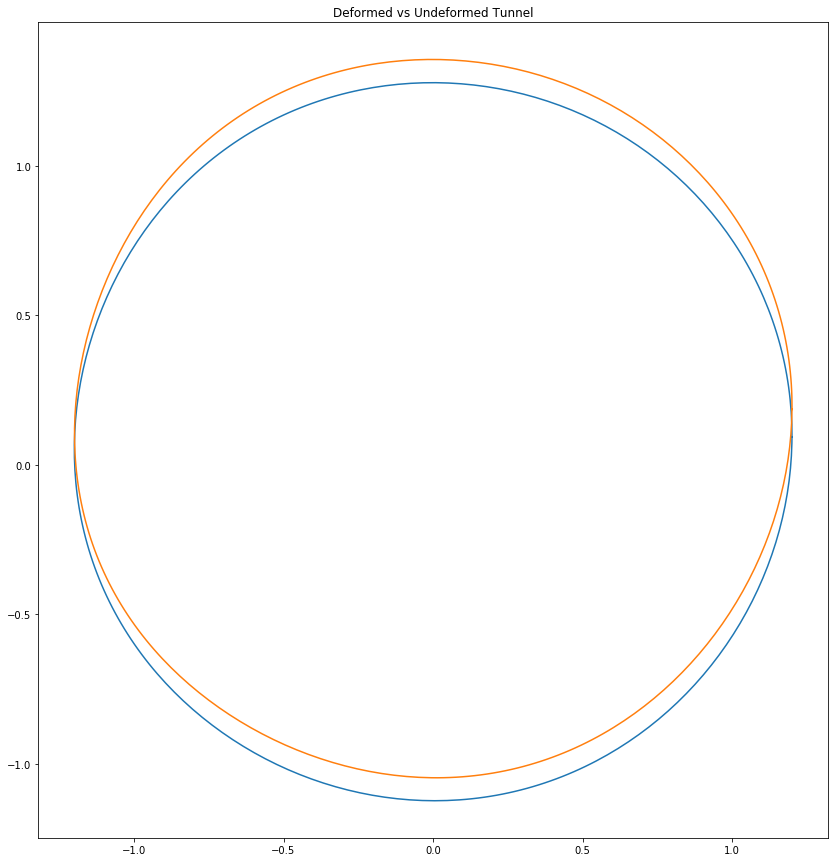

In [57]:
theta = np.linspace(0, 2*np.pi, 360)

radius = 1.2

x = radius*np.cos(theta)+2*np.array(U1_result)
y = radius*np.sin(theta)+2*np.array(U3_result)

figure, axes = plt.subplots(1)

axes.plot(a, b)
axes.plot(x, y)
axes.set_aspect(1)

figure.set_figheight(15)
figure.set_figwidth(15)

plt.title('Deformed vs Undeformed Tunnel')
plt.show()